## Part 1: Basic Logistic Regression

In [11]:
# To Do: Import data processing packages
import numpy as np
import pandas as pd
import random as rnd

In [12]:
# To Do: Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# To Do: Import scikit-learn packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [14]:
# To Do: Load Datasets
from sklearn import datasets

In [15]:
# To Do: Load dasasets from scikit learn dataset library
cancer = datasets.load_breast_cancer()

In [16]:
# To Do: Print data description using built-in function from scikit-learn
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [17]:
# To Do: Import all data in a single pandas dataframe
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))

In [18]:
# To Do: Check the available data representation in the datasets
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [20]:
# To Do: Import all features into a single pandas dataframe

#import ke sebuah data frame baru
train_df =pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [21]:
# To Do: Import diagnosis/target into a single pandas dataframe
test_df = pd.DataFrame(cancer.target,columns=["Diagnosis"])

In [22]:
# To Do: Use pandas info on data train to see features type, null cells, etc 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [23]:
# To Do: Use pandas info on data test to see features type, null cells, etc 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
Diagnosis    569 non-null int32
dtypes: int32(1)
memory usage: 2.3 KB


In [26]:
# To Do: Create new object for training
X = train_df
y = test_df.values.ravel()

In [27]:
# To Do: Create linear regression model
model = LogisticRegression(max_iter=10000)

In [28]:
# To Do: Fit the data to the model
model.fit(X,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# To Do: Calculate model score
model.score(X,y)

0.9595782073813708

In [ ]:
# To Do: Calculate parameters
...
...

In [32]:
# To Do: Calculate predictions using regressor data as input, and print five first result
predictions = model.predict(X)
print(predictions[0:5])

[0 0 0 1 0]


## Part 2: Drop features for simplification

In [37]:
# To Do: Copy to new dataframe
df_drop=df.copy()

In [38]:
# To Do: Take three features as our object of study and drop the other features
df_drop = df_drop.drop(['mean perimeter', 'perimeter error', 'worst perimeter'], axis=1)
df_drop = df_drop.drop(['mean area', 'area error', 'worst area'], axis=1)
df_drop = df_drop.drop(['mean smoothness', 'smoothness error', 'worst smoothness'], axis=1)
df_drop = df_drop.drop(['mean compactness', 'compactness error', 'worst compactness'], axis=1)
df_drop = df_drop.drop(['mean concavity', 'concavity error', 'worst concavity'], axis=1)
df_drop = df_drop.drop(['mean concave points', 'concave points error', 'worst concave points'], axis=1)
df_drop = df_drop.drop(['mean symmetry', 'symmetry error', 'worst symmetry'], axis=1)
df_drop = df_drop.drop(['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension'], axis=1)

In [40]:
# To Do: Check the available data
df_drop.columns

Index(['mean radius', 'mean texture', 'radius error', 'texture error',
       'worst radius', 'worst texture', 'diagnosis'],
      dtype='object')

In [41]:
# To Do: Print data head
df_drop.head()

mean radius  mean texture  radius error  texture error  worst radius  \
0        17.99         10.38        1.0950         0.9053         25.38   
1        20.57         17.77        0.5435         0.7339         24.99   
2        19.69         21.25        0.7456         0.7869         23.57   
3        11.42         20.38        0.4956         1.1560         14.91   
4        20.29         14.34        0.7572         0.7813         22.54   

   worst texture  diagnosis  
0          17.33        0.0  
1          23.41        0.0  
2          25.53        0.0  
3          26.50        0.0  
4          16.67        0.0

In [42]:
# To Do: Describe data
df_drop.describe()

mean radius  mean texture  radius error  texture error  worst radius  \
count   569.000000    569.000000    569.000000     569.000000    569.000000   
mean     14.127292     19.289649      0.405172       1.216853     16.269190   
std       3.524049      4.301036      0.277313       0.551648      4.833242   
min       6.981000      9.710000      0.111500       0.360200      7.930000   
25%      11.700000     16.170000      0.232400       0.833900     13.010000   
50%      13.370000     18.840000      0.324200       1.108000     14.970000   
75%      15.780000     21.800000      0.478900       1.474000     18.790000   
max      28.110000     39.280000      2.873000       4.885000     36.040000   

       worst texture   diagnosis  
count     569.000000  569.000000  
mean       25.677223    0.627417  
std         6.146258    0.483918  
min        12.020000    0.000000  
25%        21.080000    0.000000  
50%        25.410000    1.000000  
75%        29.720000    1.000000  
max        49.540000    1.000000

In [43]:
# To Do: Create data train-y
#df_drop_y=df_drop['diagnosis']#karna numpy
df_drop_y=pd.DataFrame(df_drop['diagnosis'])
df_drop_y.head()

diagnosis
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0

In [44]:
# To Do: Create data test
df_drop_X=df_drop.drop(['diagnosis'],axis=1)
df_drop_X.head()

mean radius  mean texture  radius error  texture error  worst radius  \
0        17.99         10.38        1.0950         0.9053         25.38   
1        20.57         17.77        0.5435         0.7339         24.99   
2        19.69         21.25        0.7456         0.7869         23.57   
3        11.42         20.38        0.4956         1.1560         14.91   
4        20.29         14.34        0.7572         0.7813         22.54   

   worst texture  
0          17.33  
1          23.41  
2          25.53  
3          26.50  
4          16.67

In [45]:
# To Do: Create new object for training
X=df_drop_X
y=df_drop_y.values.ravel()

In [46]:
# To Do: Create linear regression model
model = LogisticRegression(max_iter=10000)

In [47]:
# To Do: Fit the data to the model
model.fit(X,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# To Do: Calculate model score
model.score(X,y) #fiturnya terlalu banyak ss

0.9349736379613357

In [49]:
# To Do: Calculate parameters
print(model.intercept_)
print(model.coef_) #akurasinya turun

[7.44759291]
[[ 1.30230038  0.09133368 -1.84447438  0.35470134 -1.50829774 -0.10097995]]


## Part 3: Data Visualization

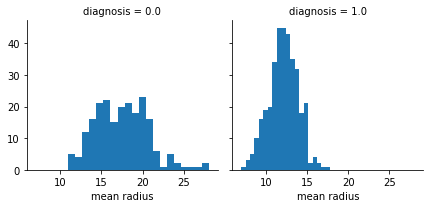

In [50]:
# To Do: Visualize hisogram for mean radius, divided by the diagnosis
g=sns.FacetGrid(df_drop,col='diagnosis')
g.map(plt.hist,'mean radius',bins=20)
g.add_legend();

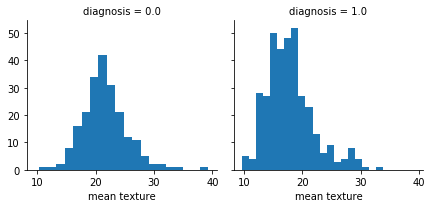

In [51]:
# To Do: Visualize hisogram for mean texture, divided by the diagnosis
g=sns.FacetGrid(df_drop,col='diagnosis')
g.map(plt.hist,'mean texture',bins=20)
g.add_legend();

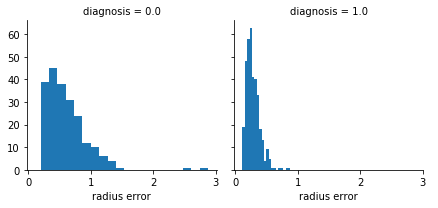

In [52]:
# To Do: Visualize hisogram for radius error, divided by the diagnosis
g=sns.FacetGrid(df_drop,col='diagnosis')
g.map(plt.hist,'radius error',bins=20)
g.add_legend();

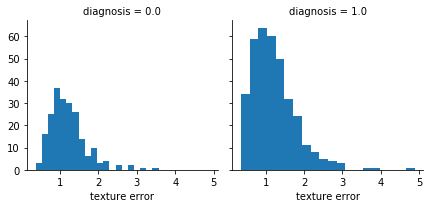

In [53]:
# To Do: Visualize hisogram for texture error, divided by the diagnosis
g=sns.FacetGrid(df_drop,col='diagnosis')
g.map(plt.hist,'texture error',bins=20)
g.add_legend();


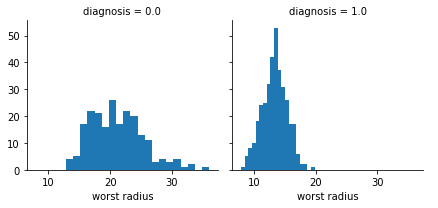

In [54]:
# To Do: Visualize hisogram for worst radius, divided by the diagnosis
g=sns.FacetGrid(df_drop,col='diagnosis')
g.map(plt.hist,'worst radius',bins=20)
g.add_legend();

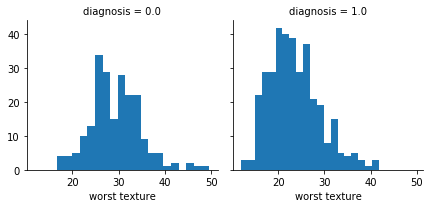

In [56]:
# To Do: Visualize hisogram for worst texture, divided by the diagnosis
g=sns.FacetGrid(df_drop,col='diagnosis')
g.map(plt.hist,'worst texture',bins=20)
g.add_legend();

## Part 4: Split Data for Train and Test

In [57]:
# To Do: Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
# To Do: Make sure the X_train data shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 6)
(455,)
(114, 6)
(114,)


In [59]:
# To Do: Create regressor and fit data train
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# To Do: Calculate model score for data train
train_score = model.score(X_train,y_train)
print('data train - coefficient of determination:', train_score)

data train - coefficient of determination: 0.9296703296703297


In [61]:
# To Do: Calculate model score for data test
test_score = model.score(X_test,y_test)
print('data test - coefficient of determination:', test_score)

data test - coefficient of determination: 0.9298245614035088


## Homework 3

Create logistic regression model using only three features from features dataframe to predict diagnosis.
The three features must be chosen based on analysis.
Utilize pandas and seaborn to process and visualize data.
Aim for the highest score as possible as you can.

Submission start: March, 16th 2020.
Submission end:   March, 23th 2020.

## Exploratory Data Analysis dan Preprocessing
Hal yang pertama harus dilakukan adalah me-load dataset Breast Cancer dari scikit-learn.

In [62]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.preprocessing import MinMaxScaler 
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [64]:
print(cancer.feature_names, len(cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 30


In [65]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890          0  
1          0.2750                  0.08902          0  
2          0.3613                  0.08758          0  
3          0.6638                  0.17300          0  
4          0.2364                  0.07678          0  

[5 rows x 31 columns]

In [66]:
#Normalisasi dataset
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                0.605518  ...       0.141525         0.668310    0.450698   
1                0.141323  ...       0.303571         0.539818    0.435214   
2                0.211247  ...       0.360075         0.508442    0.374508   
3                1.000000  ...       0.385928         0.241347    0.094008   
4                0.186816  ...       0.123934         0.506948    0.341575   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0          0.601136           0.619292         0.568610              0.912027   
1          0.347553           0.154563         0.192971              0.639175   
2          0.483590           0.385375         0.359744              0.835052   
3          0.915472           0.814012         0.548642              0.884880   
4          0.437364           0.172415         0.319489              0.558419   

   worst symmetry  worst fractal dimension  diagnosis  
0        0.598462                 0.418864        0.0  
1        0.233590                 0.222878        0.0  
2        0.403706                 0.213433        0.0  
3        1.000000                 0.773711        0.0  
4        0.157500                 0.142595        0.0  

[5 rows x 31 columns]

Dataset breast cancer terdiri atas 30 fitur. Berikut adalah grafik yang menggambarkan korelasi antar fitur dan korelasi fitur dengan diagnosis. Dapat dilihat fitur yang urutannya berdekatan memiliki korelasi yang cukup tinggi. Selain itu, korelasi fitur dengan diagnosis sebagian besar memiliki nilai negatif, kurang dari -0.5.

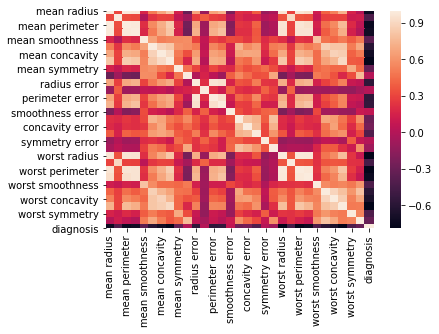

In [67]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix)

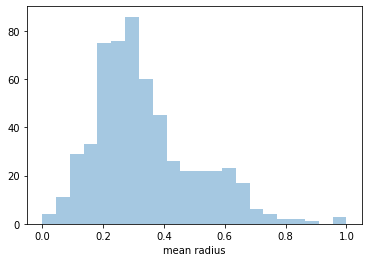

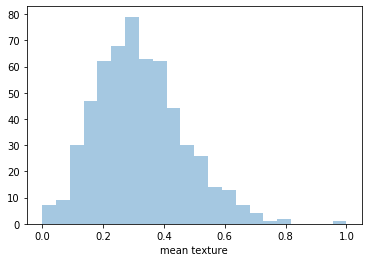

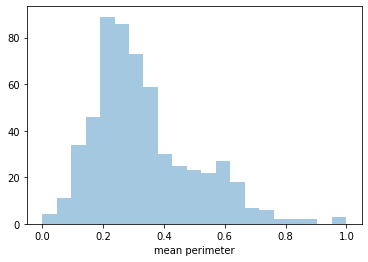

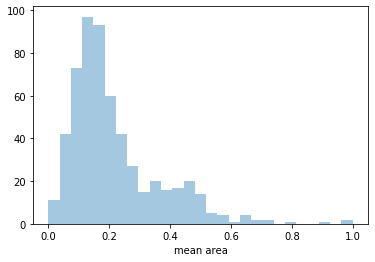

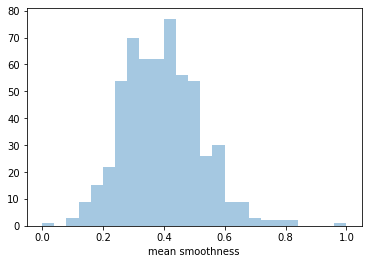

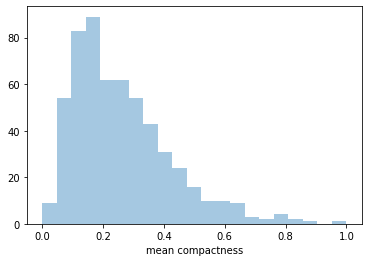

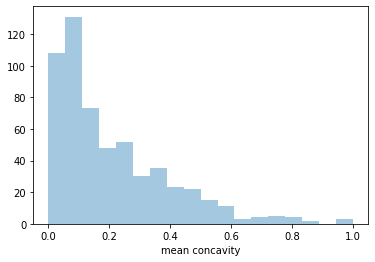

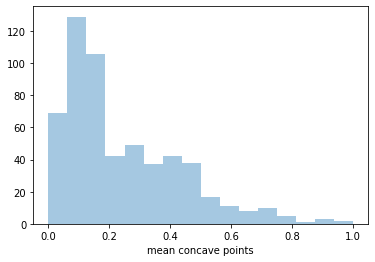

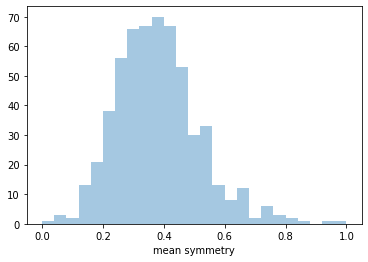

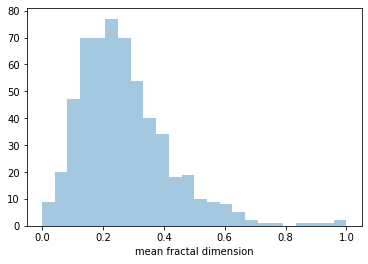

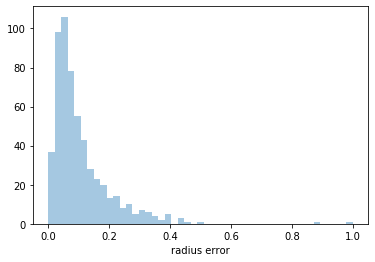

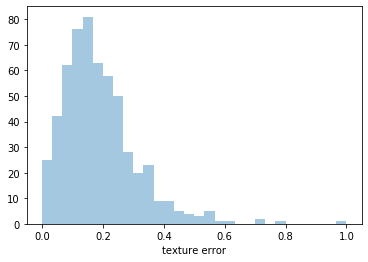

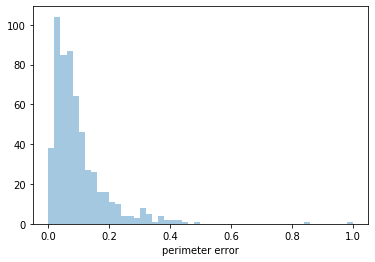

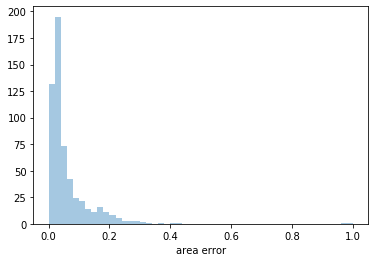

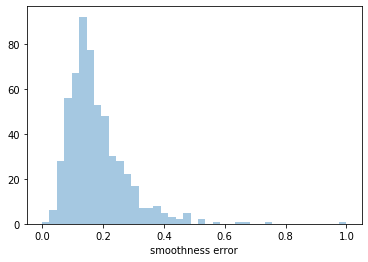

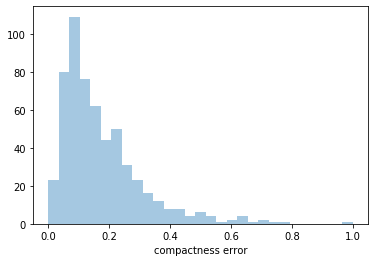

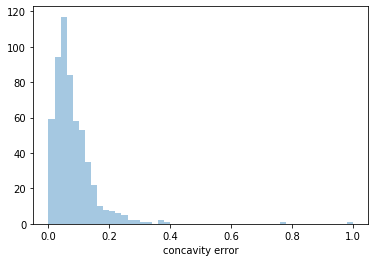

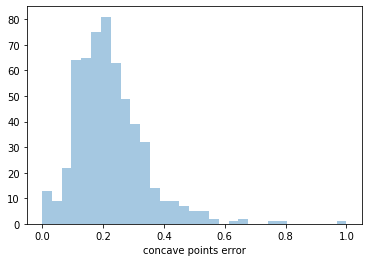

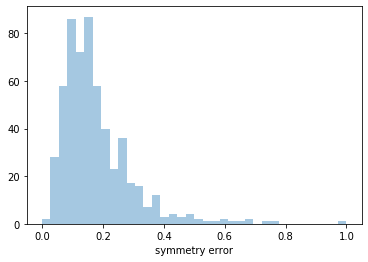

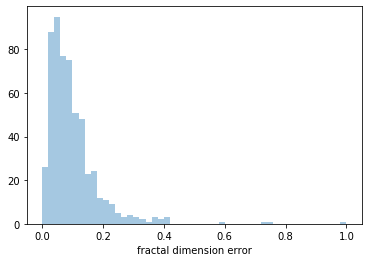

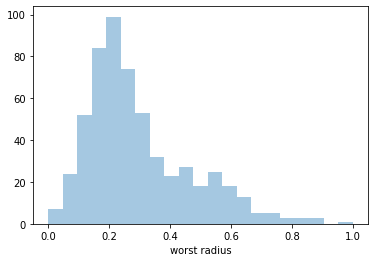

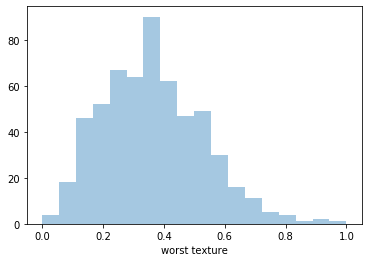

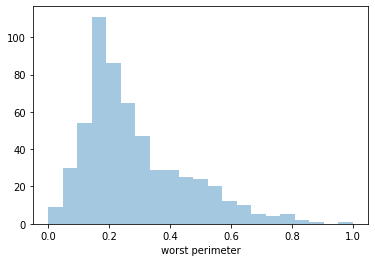

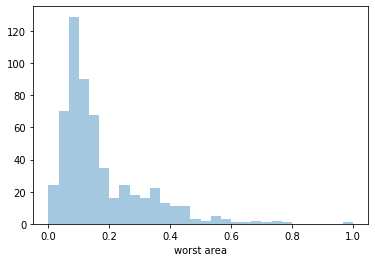

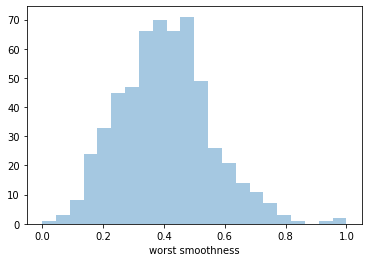

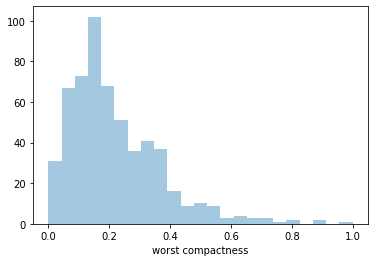

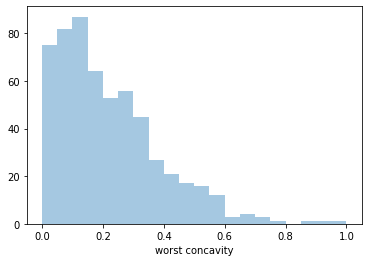

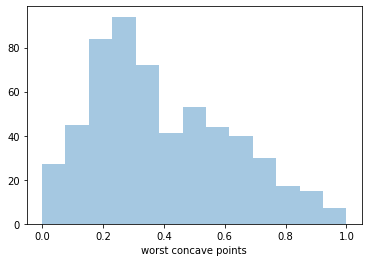

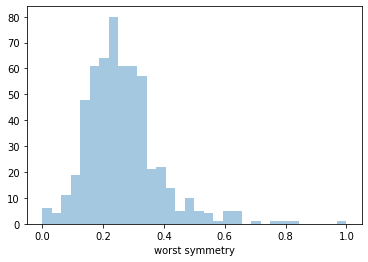

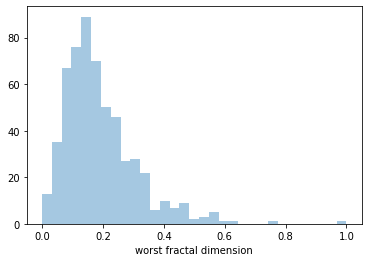

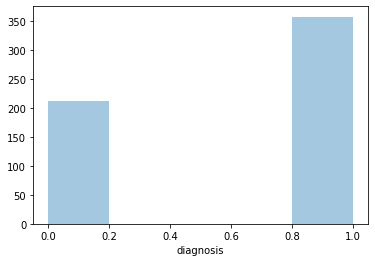

In [68]:
for col in df.columns:
  plt.figure()
  sns.distplot(df[col], kde=False)
  plt.show()

## Regresi Logistik dengan Semua Feature
Dengan semua fitur, diperoleh score 0.98.

In [70]:
X = df.drop('diagnosis', 1)
y = df['diagnosis']

In [71]:
model = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9736842105263158

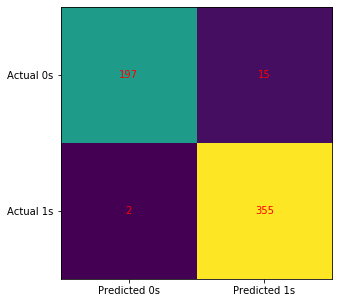

In [72]:
conf_mat = confusion_matrix(y, model.predict(X))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')
plt.show()

In [73]:
class_report = classification_report(y, model.predict(X))
print('classification report:\n', class_report)

classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       212
         1.0       0.96      0.99      0.98       357

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.97       569
weighted avg       0.97      0.97      0.97       569



## Feature Selection dengan Recursive Feature Elimination
Untuk pemilihan fitur, disini digunakan algoritma RFE (Recursive Feature Elimination). RFE bekerja secara iteratif, mengurangi fitur satu per satu. Pada tiap iterasi, model dilatih ulang. Fitur pada iterasi yang dinilai paling tidak penting, akan dihilangkan pada iterasi selanjutnya. Iterasi akan terus berlanjut sampai banyak fitur yang tersisa sudah sesuai banyak yang diinginkan. Scikit-learn menyediakan fitur RFE, yang disini akan digunakan.

In [74]:
from sklearn.feature_selection import RFE

print(X.shape, y.shape)
lr = LogisticRegression(max_iter=10000)

# Rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, 3)
rfe.fit(X,y)

# # model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

(569, 30) (569,)
[False False False False False False False  True False False False False
 False False False False False False False False  True False False False
 False False False  True False False]
[18 16 12  8 24 23  5  1 26  6  9 21 13 15 25 11 22 28 20 17  1  4  2  3
 19 10  7  1 14 27]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Output RFE di atas menunjukkan kolom mana yang terpilih, dari kolom mana yang menjadi bernilai 1. Untuk memperoleh list kolom yang terpilih, digunakan kode di bawah:

In [75]:
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['mean concave points', 'worst radius', 'worst concave points'], dtype='object')


In [76]:
Xpr_cols = list(selected_features_rfe)
Xpr = df[Xpr_cols]
Xpr.head()

mean concave points  worst radius  worst concave points
0             0.731113      0.620776              0.912027
1             0.348757      0.606901              0.639175
2             0.635686      0.556386              0.835052
3             0.522863      0.248310              0.884880
4             0.518390      0.519744              0.558419

In [77]:
Xpr.isnull().any()

mean concave points     False
worst radius            False
worst concave points    False
dtype: bool

Dapat dilihat bahwa fitur yang terpilih adalah :
1. Worst Radius
2. Worst Perimeter
3. Worst Concave Points

Berikut adalah visualisasi dari fitur yang terpilih:

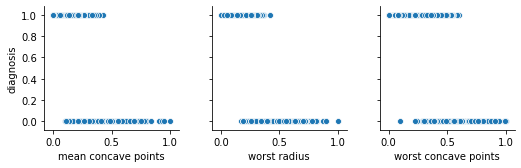

In [78]:
sns.pairplot(df, x_vars=Xpr_cols,y_vars=['diagnosis'])

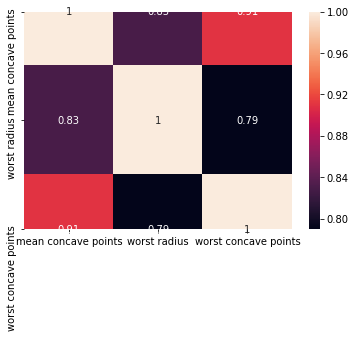

In [79]:
correlation_matrix = Xpr.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Fitur-fitur yang dipilih RFE ternyata cukup berkorelasi.

## Melatih Model dengan fitur yang tereduksi
Dengan 3 fitur tersebut, diperoleh score 0.94.

In [83]:
model = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [84]:
class_report = classification_report(y, model.predict(Xpr))
print('classification report:\n', class_report)

classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       212
         1.0       0.93      0.98      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.92      0.93       569
weighted avg       0.94      0.94      0.94       569



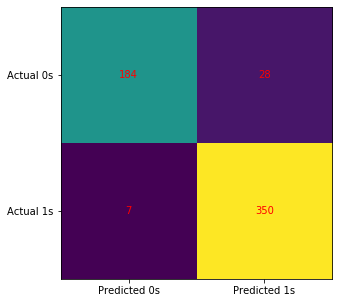

In [85]:
conf_mat = confusion_matrix(y, model.predict(Xpr))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')
plt.show()